# Standardizing enhanced sampling analysis

#### Motivation:
The tools a group or individual uses for post-processing the output from a PLUMED simulation can vary widely. Custom scripts (for reweighting biased simulations, demultiplexing replica exchange simulations, etc.) are written and rewritten for specific projects since no single package flexibly satisfies the analysis and visualization needs for PLUMED output. Disposable analysis scripts are error prone since they may be readily forgotten after results have been analyzed and papers published. A Python package for analysis and visualization of PLUMED output will make post-processing more accurate and efficient. iPython notebooks can be easily shared (and Binder-ized like this one!) between experts in the field and newcomers to improve knowledge transfer and reproducibility. 

#### Strategy: 
I have written python classes to store the output files from metadynamics or parallel bias metadynamics (PB MetaD) simulations. Standard analysis and visualization methods have been added to these classes, so that a user can easily load, analyze, and visualize their results directly from the raw PLUMED output. The procedure for analysis and visualization for a PB MetaD simulation of alanine dipeptide, biasing phi and psi angles, is included below. Ideally, we will be able to add more extensive analysis and visualization methods and create classes for every enhanced sampling technique available in PLUMED.

#### Procedure:
    1. import numpy, pandas, pyplot, and plumitas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plumitas as plm

    2. load PLUMED input and output files for your project

In [2]:
pbmetad_colvar = 'data/pbmetad/COLVAR'
pbmetad_hills = 'data/pbmetad/HILLS'
pbmetad_plumed = 'data/pbmetad/plumed.dat'

pbmetad = plm.load_project(pbmetad_colvar, pbmetad_hills, 
                           method='pbmetad', bias_type='pbmetad',
                           input_file=pbmetad_plumed)

    3. visualize collective variables (if you want)

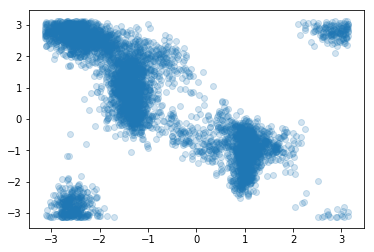

In [3]:
plt.scatter(pbmetad.hills['phi']['phi'], 
            pbmetad.hills['psi']['psi'],
            alpha=0.2)

    4. reconstruct quasistatic bias potential from simulation

In [4]:
pbmetad.reconstruct_bias_potential()

    5. assign frame weights for unbiased ensemble

In [5]:
pbmetad.weight_frames()

    6. visualize free energy profiles

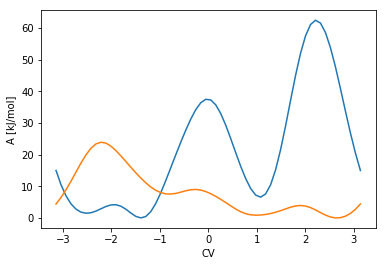

In [6]:
pbmetad.potential_of_mean_force(['phi', 'psi'])

/Users/joshsmith/Git/plumitas_examples/.env/lib/python3.6/site-packages/plumitas/core.py:369: RuntimeWarning: divide by zero encountered in log
  hist = -np.log(hist) / beta


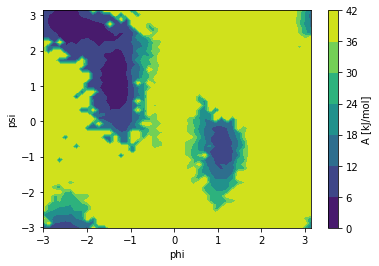

In [7]:
pbmetad.free_energy_surface('phi', 'psi', weight='weight')